<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/1_Wave_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение волнового уравнения:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter

# u_tt = u_xx / 2 + 2.5 * th(t-x) / ch^2(t-x)


T_0 = 1
ro = 2

a0, b0, a1, b1 = 2, -1, 0, 1

def kurant(a, tau, h):
  return ((a*tau)/h)**2

def koef_a(T_0, ro):
  return T_0 / ro

def stability_condition(h, tau):
  if (koef_a(T_0, ro) * tau) / h <= 1:
    return True
  else:
    return False

def u0(x,t):
  return (5/2)*np.tanh(x-t)

def f(x,t):
  return 2.5 * np.tanh(t-x) / (np.cosh(t-x))**2

#начальные условия
def phi1(x):
  return 5/2 * np.tanh(x)

def phi2(x):
  return (-5 / 2) / (np.cosh(x))**2

#граничные условия
def gamma1(t):
  return -5 * np.tanh(t) - (5/2) / (np.cosh(t))**2

def gamma2(t):
  return (5/2) / (np.cosh(1-t))**2

xmin =  0
xmax = 1
h_cur = 0.05

tmin = 0
tmax = 1
tau_cur = 0.05

# Аппроксимация 1 порядка:

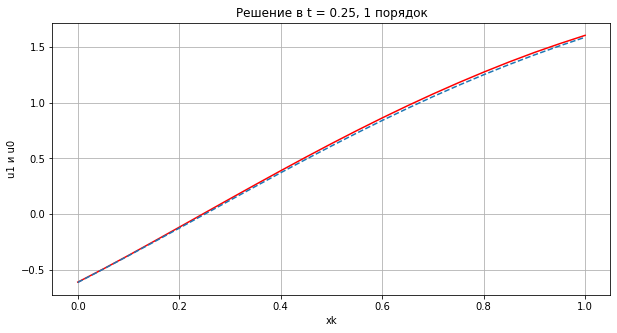

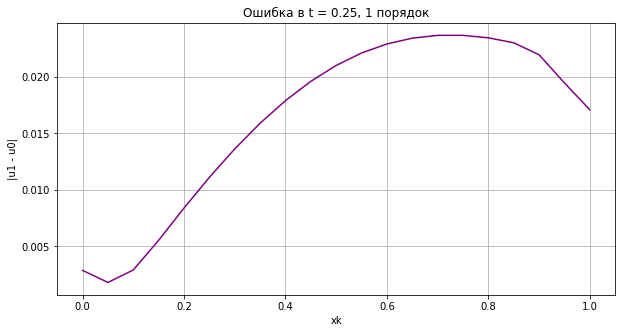

In [ ]:
def ap1(h, tau):

  xk = np.arange(xmin, xmax + h, h)
  tn = np.arange(tmin, tmax + tau, tau)
  u1 = np.zeros((len(tn),len(xk)))

  K = kurant(koef_a(T_0,ro), tau, h)
  #аппроксимация начальных условий
  for k in range (0, len(xk)):
    u1[0][k] = phi1(xk[k])
    u1[1][k] = u1[0][k] + tau * phi2(xk[k])

    
  #аппроксимация граничных условий
  for n in range (1, len(tn) - 1):
    for k in range (1, len(xk)-1):
      u1[n+1][k] = K * (u1[n][k+1] - 2 * u1[n][k] + u1[n][k-1]) + 2 * u1[n][k] - u1[n-1][k] + f(xk[k], tn[n]) * (tau**2)

      u1[n+1][0] = ( u1[n+1][1] - h * gamma1(tn[n+1]) / b0 ) / (1 - h*a0/b0)
      u1[n+1][len(xk)-1] = ( u1[n+1][len(xk) - 1 - 1] + h * gamma2(tn[n+1]) / b1 ) / (1 + h * a1 / b1)

  return u1

xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
tn_cur = np.arange(tmin, tmax + tau_cur, tau_cur)

yreal1 = [u0(x, tn_cur[5]) for x in xk_cur ]
ypol1 = [ap1(h_cur,tau_cur)[5][k] for k in range (0,len(xk_cur))]
diff1 = [abs(yreal1[i] - ypol1[i]) for i in range(len(yreal1))]

plt.figure(figsize=(10,5))
plt.title("Решение в t = 0.25, 1 порядок")
plt.xlabel("xk")
plt.ylabel("u1 и u0")
plt.grid()
plt.plot(xk_cur, ypol1, color='red')
plt.plot(xk_cur, yreal1 , linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка в t = 0.25, 1 порядок")
plt.xlabel("xk")
plt.ylabel("|u1 - u0|")
plt.grid()
plt.plot(xk_cur, diff1, color='purple')





# Аппроксимация 2 порядка:

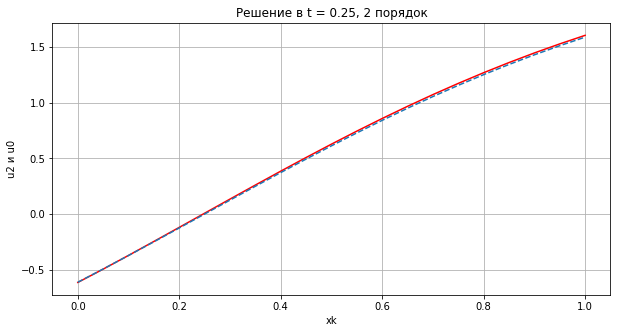

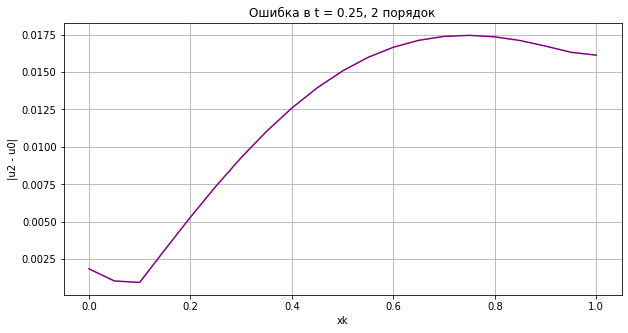

In [ ]:
def d2phi1(x):
  return -5 * np.sinh(2*x) / (2*np.cosh(x))**4

def ap2(h,tau):

  xk = np.arange(xmin, xmax + h, h)
  tn = np.arange(tmin, tmax + tau, tau)
  u2 = np.zeros((len(tn),len(xk)))
  K = kurant(koef_a(T_0,ro), tau, h)
  #аппроксимация начальных условий
  for k in range (0, len(xk)):
    u2[0][k] = phi1(xk[k])
    u2[1][k] = u2[0][k] + tau * phi2(xk[k]) + tau**2 / 2 * (koef_a(T_0, ro)**2 * d2phi1(xk[k]) + f(xk[k], 0))

  #аппроксимация граничных условий
  for n in range (1, len(tn) - 1):
    for k in range (1, len(xk)-1):
      u2[n+1][k] = 2 * u2[n][k] - u2[n-1][k] + K * (u2[n][k+1] - 2 * u2[n][k] + u2[n][k-1]) + f(xk[k], tn[n]) * tau**2
      
      u2[n+1][0] = 2 * K * (u2[n][1] - (1 - h * a0 / b0) * u2[n][0] - h * gamma1(tn[n]) / b0) + 2 * u2[n][0] - u2[n-1][0] + tau**2 * f(0, tn[n])    
      u2[n+1][len(xk)-1] = 2 * K * (u2[n][len(xk) - 1 - 1] - (1 + h * a1 / b1) * u2[n][len(xk)-1] + h * gamma2(tn[n]) / b1) + 2 * u2[n][len(xk)-1] - u2[n-1][len(xk)-1] + tau**2 * f(xk[len(xk)-1], tn[n])

  return u2

xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
tn_cur = np.arange(tmin, tmax + tau_cur, tau_cur)
yreal2 = [u0(x, tn_cur[5]) for x in xk_cur ]
ypol2 = [ap2(h_cur,tau_cur)[5][k] for k in range (0,len(xk_cur))]
diff2 = [abs(yreal2[i] - ypol2[i]) for i in range(len(yreal2))]

plt.figure(figsize=(10,5))
plt.title("Решение в t = 0.25, 2 порядок")
plt.xlabel("xk")
plt.ylabel("u2 и u0")
plt.grid()
plt.plot(xk_cur, ypol2, color='red')
plt.plot(xk_cur, yreal2, linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка в t = 0.25, 2 порядок")
plt.xlabel("xk")
plt.ylabel("|u2 - u0|")
plt.grid()
plt.plot(xk_cur, diff2, color='purple')


# Анимация:

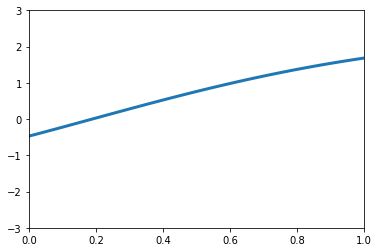

In [ ]:
def animation(): 

    h_anim = 0.01
    tau_anim = 0.01
    yr = ap1(h_anim,tau_anim)

    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-3, 3))
    line, = ax.plot([], [], lw=3)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        x = np.arange(xmin, xmax+h_anim, h_anim)
        y = [yr[i][k] for k in range(0, len(x))]
        line.set_data(x, y)  
        return line,

    anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
    anim.save('solution.gif', writer='pillow')

animation()